In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Input, Dense, Dropout
from keras import Model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly import figure_factory as figfactory

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis - Final/Gold Futures Historical Data.csv')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Drop unnecessary columns
columns_to_drop = ['Vol.', 'Change %']
df = df[[col for col in df.columns if col not in columns_to_drop]]

# Convert Date to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Remove commas and convert numerical columns to float
for col in ['Open', 'High', 'Low', 'Price']:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Scale the Price data using MinMaxScaler
price_scaler = MinMaxScaler()
df['Price'] = price_scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Define window size
window_size = 60

# Prepare data for Linear Regression model
# Split the data into training and testing sets
train_data_lr = df[df.index.year < 2014]['Price']
test_data_lr = df[df.index.year == 2023]['Price']

# Create training windows for Linear Regression
X_train_lr = []
y_train_lr = []
for i in range(window_size, len(train_data_lr)):
    X_train_lr.append(train_data_lr[i-window_size:i].values)
    y_train_lr.append(train_data_lr.iloc[i])  # Use .iloc[] to access by position

# Create testing windows for Linear Regression
X_test_lr = []
y_test_lr = []
for i in range(window_size, len(test_data_lr)):
    X_test_lr.append(test_data_lr[i-window_size:i].values)
    y_test_lr.append(test_data_lr.iloc[i])  # Use .iloc[] to access by position

# Convert lists to numpy arrays
X_train_lr = np.array(X_train_lr)
y_train_lr = np.array(y_train_lr)
X_test_lr = np.array(X_test_lr)
y_test_lr = np.array(y_test_lr)

# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_train_lr = model.predict(X_train_lr)
y_pred_test_lr = model.predict(X_test_lr)

# Calculate metrics
train_mse_lr = mean_squared_error(y_train_lr, y_pred_train_lr)
test_mse_lr = mean_squared_error(y_test_lr, y_pred_test_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
train_r2_lr = r2_score(y_train_lr, y_pred_train_lr)
test_r2_lr = r2_score(y_test_lr, y_pred_test_lr)

# Calculate accuracy
train_accuracy_lr = 1 - train_mse_lr
test_accuracy_lr = 1 - test_mse_lr

# Print results
print("\nLinear Regression Model Train MSE:", train_mse_lr)
print("Linear Regression Model Test MSE:", test_mse_lr)
print("Linear Regression Model Train RMSE:", train_rmse_lr)
print("Linear Regression Model Test RMSE:", test_rmse_lr)
print("Linear Regression Model Train R2 Score:", train_r2_lr)
print("Linear Regression Model Test R2 Score:", test_r2_lr)
print("Linear Regression Model Train Accuracy (1 - MSE):", train_accuracy_lr)
print("Linear Regression Model Test Accuracy (1 - MSE):", test_accuracy_lr)

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_lr)), y_train_lr, label='Train Actual Prices')
plt.plot(np.arange(len(y_train_lr)), y_pred_train_lr, label='Train Predicted Prices', linestyle='--')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_test_lr, label='Test Actual Prices')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_pred_test_lr, label='Test Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.show()



Linear Regression Model Train MSE: 0.017567819783119297
Linear Regression Model Test MSE: 0.16322246289257972
Linear Regression Model Train RMSE: 0.13254365236826432
Linear Regression Model Test RMSE: 0.4040079985502511
Linear Regression Model Train R2 Score: 0.006768563119553761
Linear Regression Model Test R2 Score: -8.979531882521242
Linear Regression Model Train Accuracy (1 - MSE): 0.9824321802168807
Linear Regression Model Test Accuracy (1 - MSE): 0.8367775371074203


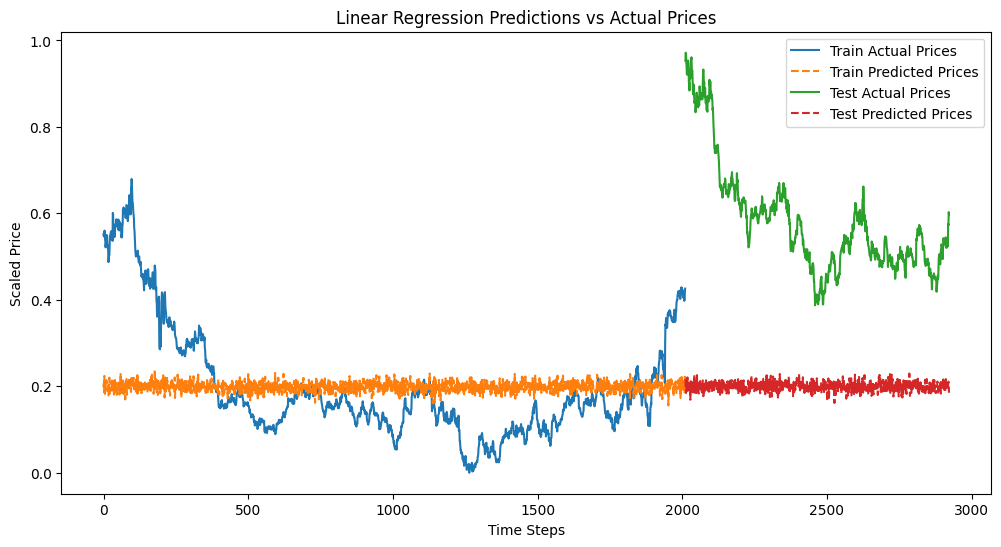

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Drop unnecessary columns
columns_to_drop = ['Vol.', 'Change %']
df = df[[col for col in df.columns if col not in columns_to_drop]]

# Convert Date to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Remove commas and convert numerical columns to float
for col in ['Open', 'High', 'Low', 'Price']:
    df[col] = df[col].replace({',': ''}, regex=True).astype(float)

# Scale the Price data using MinMaxScaler
price_scaler = MinMaxScaler()
df['Price'] = price_scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Define window size (reduced)
window_size = 5

# Prepare data for Linear Regression model
# Split the data into training and testing sets
train_data_lr = df[df.index.year < 2021]['Price']
test_data_lr = df[df.index.year >= 2021]['Price']

# Create training windows for Linear Regression
X_train_lr = []
y_train_lr = []
for i in range(window_size, len(train_data_lr)):
    X_train_lr.append(train_data_lr[i-window_size:i].values)
    y_train_lr.append(train_data_lr.iloc[i])  # Use .iloc[] to access by position

# Create testing windows for Linear Regression
X_test_lr = []
y_test_lr = []
for i in range(window_size, len(test_data_lr)):
    X_test_lr.append(test_data_lr[i-window_size:i].values)
    y_test_lr.append(test_data_lr.iloc[i])  # Use .iloc[] to access by position

# Convert lists to numpy arrays
X_train_lr = np.array(X_train_lr)
y_train_lr = np.array(y_train_lr)
X_test_lr = np.array(X_test_lr)
y_test_lr = np.array(y_test_lr)

# Add noise to the data
noise_factor = 8.0
X_train_lr += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_lr.shape)
X_test_lr += noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test_lr.shape)

# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_train_lr = model.predict(X_train_lr)
y_pred_test_lr = model.predict(X_test_lr)

# Calculate metrics
train_mse_lr = mean_squared_error(y_train_lr, y_pred_train_lr)
test_mse_lr = mean_squared_error(y_test_lr, y_pred_test_lr)
train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)
train_r2_lr = r2_score(y_train_lr, y_pred_train_lr)
test_r2_lr = r2_score(y_test_lr, y_pred_test_lr)

# Calculate accuracy
train_accuracy_lr = 1 - train_mse_lr
test_accuracy_lr = 1 - test_mse_lr

# Print results
print("\nLinear Regression Model Train MSE:", train_mse_lr)
print("Linear Regression Model Test MSE:", test_mse_lr)
print("Linear Regression Model Train RMSE:", train_rmse_lr)
print("Linear Regression Model Test RMSE:", test_rmse_lr)
print("Linear Regression Model Train R2 Score:", train_r2_lr)
print("Linear Regression Model Test R2 Score:", test_r2_lr)
print("Linear Regression Model Train Accuracy (1 - MSE):", train_accuracy_lr)
print("Linear Regression Model Test Accuracy (1 - MSE):", test_accuracy_lr)

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_lr)), y_train_lr, label='Train Actual Prices')
plt.plot(np.arange(len(y_train_lr)), y_pred_train_lr, label='Train Predicted Prices', linestyle='--')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_test_lr, label='Test Actual Prices')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_pred_test_lr, label='Test Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.show()


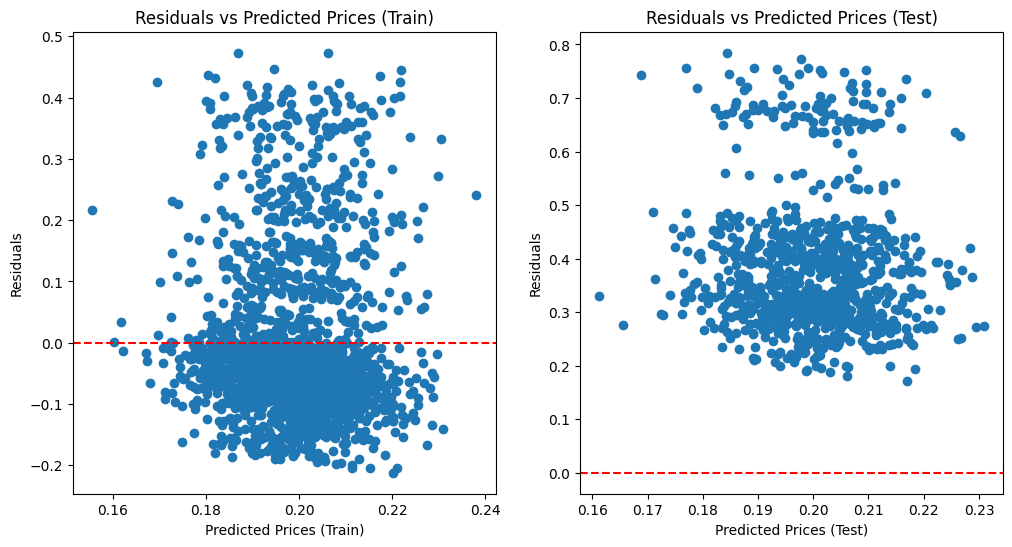

In [ ]:
residuals_train = y_train_lr - y_pred_train_lr
residuals_test = y_test_lr - y_pred_test_lr

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train_lr, residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Train)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices (Train)')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_test_lr, residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Test)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices (Test)')

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Reshape data for cross-validation
X = np.concatenate((X_train_lr, X_test_lr), axis=0)
y = np.concatenate((y_train_lr, y_test_lr), axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print("Cross-Validation MSE:", cv_mse)
print("Cross-Validation RMSE:", cv_rmse)


Cross-Validation MSE: 0.06506847962282848
Cross-Validation RMSE: 0.25508523991565735


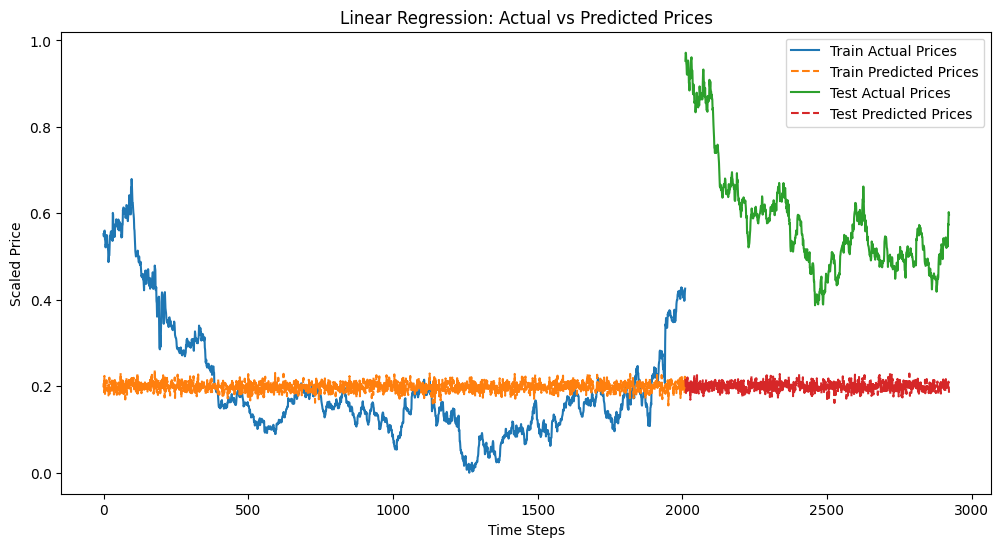

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_lr)), y_train_lr, label='Train Actual Prices')
plt.plot(np.arange(len(y_train_lr)), y_pred_train_lr, label='Train Predicted Prices', linestyle='--')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_test_lr, label='Test Actual Prices')
plt.plot(np.arange(len(y_train_lr), len(y_train_lr) + len(y_test_lr)), y_pred_test_lr, label='Test Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Scaled Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()
